<center>

# Relazione 6

</center>

**NB:** in questa esercitazione è utilizzata la libreria random.h, necessaria per generare uniformemente numeri casuali. Tale libreria si trova nella cartella RANDOM_GEN: per compilare è prima necessario utilizzare il comando 'source setup.sh'. Il file setup.sh si trova nella cartella LSN_Delivery

In [66]:
import numpy as np
import matplotlib.pyplot as plt

L'obiettivo di questa esercitazione è lo studio del modello di Ising mono-dimensionale. Il modello di Ising consiste in una modellizzazione di un magnete: su ogni vertice di una struttura reticolare che costituisce la struttura interna del magnete si trova uno ed un solo momento di dipolo magnetico. Gli spin vengono assunti della più semplice forma possibile, ossia uno scalare che può assumere come valori solamente: $$s_i\,=\,\pm 1$$
Tali valori rappresentano dei dipoli di modulo unitario che puntano verso l'alto oppure verso il basso. Consideriamo $N$ spin con condizioni periodiche al contorno (questo mi consente di simulare un sistema in realtà molto più grande) e con interazione solamente fra spin adiacenti. L'Hamiltoniana che regola l'evoluzione del sistema considerato è:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

Lavoreremo con $J\,\gt\,0$, ossia in regime ferromagnetico. L'importanza di questo modello è che è risolvibile analiticamente e quindi è possibile confrontare i risulati delle simulazioni con quelli teorici. In particolare siamo interessati ai seguenti osservabili:

- Energia interna: $\qquad\qquad U\left(N,\,T\right)\,=\,\langle H \rangle _{h=0}$

- Calore specifico: $\qquad C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$

- Suscettibilità magnetica: $\qquad \chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$

- Magnetizzazione: $\qquad M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

come funzione di $T \in \left[0.5,\,2.0 \right]$ con un sistema di $N\,=\,50\,$ spin e $J\,=\,1$. Tali quantità possono essere ricavate dalla funzione di partizione:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

dove
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$
e si ha anche che $\beta=\frac{1}{k_b T} = \frac{1}{T}$.

## Evoluzione

Per evolvere il sistema preso in considerazione è necessario campionare il peso statistico di Boltzmann. Per uno stato generico $\mu$ esso risulta essere:

$$
p\left(\mu\right)\,=\,\frac{e^{-\beta H_{\mu}}}{Z}
$$

dove Z è la funzione di partizione, che tiene conto di tutte le possibili configurazioni del sistema analizzato. Per campionare tale peso statistico possiamo utilizzare due metodi:
1. Metropolis

2. Gibbs


### Metropolis

L'algortmo di Metropolis procede come segue. Viene scelto a caso uno spin dei 50 che compongono il sistema e si prova ad invertirne l'orientamento. Valuto l'energia dell'ipotetica nuova configurazione e vi sottraggo quella della vecchia. Il flip viene accettato con una probabilità che è il minimo valore fra:
$$
A\left(\nu|\mu\right)\,=\,min\left[1,\,\exp\left(-\beta\left(E_{\nu}\,-\,E_{\mu}\right)\right)\right]
$$
dove $\nu$ sta ad indicare la nuova configurazione, mentre $\mu$ la vecchia. Un move Monte-Carlo di tipo Metropolis consiste nel tentare per $n_{volte}\,=\,N$ tale cambio di orientamento (ogni volta lo spin da flippare è scelto randomicamente).

### Gibbs

Il metodo di Gibbs consiste in un caso particolare dell'algoritmo di Metropolis dove la mossa proposta viene sempre accettata: ciò viene ottenuto rimpiazzando lo spin selezionato casualmente con un valore determinato dalla sua distribuzione condizionata ai valori assunti dagli altri spin. In particolare viene selezionato uno spin. Si valuta quanto valga l'energia del sistema se lo spin è up oppure se lo spin è down. Lo spin viene messo up con probabilità:
$$
p(\uparrow)\,=\,\frac{1}{1\,+\,\exp{\left[\beta(E_{up}\,-\,E_{down})\right]}}
$$
altrimenti viene messo down. In questo senso la mossa è sempre accettata. Anche in questo caso una mossa Monte-Carlo di tipo Gibbs consiste nel tentare per $n_{volte}\,=\,N$ tale cambio di orientamento (ogni volta lo spin da flippare è scelto randomicamente).

<span style="color:blue">

## Termalizzazione

</span>

Il sistema viene inizializzato in una configurazione tipica di $T\,=\,+\infty$, ossia con spin orientati casualmente. Prima di iniziare ad effettuare delle misure sul sistema stesso è quindi necessario attendere che esso si porti in una configurazione tipica della temperatura alla quale si vuole lavorare: tale processo richiederà tanto più tempo quanto minore sarà la temperatura selezionata dall'esterno. Di seguito riporto i grafici della termalizzazione per $T\,=\,0.5,\,1.0,\,1.5,\,2.0$ sia per l'algoritmo di Metropolis che per quello di Gibbs.

### $h\,=\,0$

Nel caso con campo esterno nullo l'osservabile sul quale vado a studiare la termalizzazione è l'energia per spin.

In [67]:
#Valori simulati
term = np.loadtxt("Osservabili/TermEne.dat", unpack=True)

#Valori veri
points=4
T_1 = np.linspace(0.5,2.0,num=points)
beta = 1/T_1
J = 1.0
Ns = 50
th = np.tanh(J/T_1)
thN= th**Ns
ch = 1/th
e_1 = -J*( th + ch*thN )/( 1 + thN )

##### Metodo Metropolis

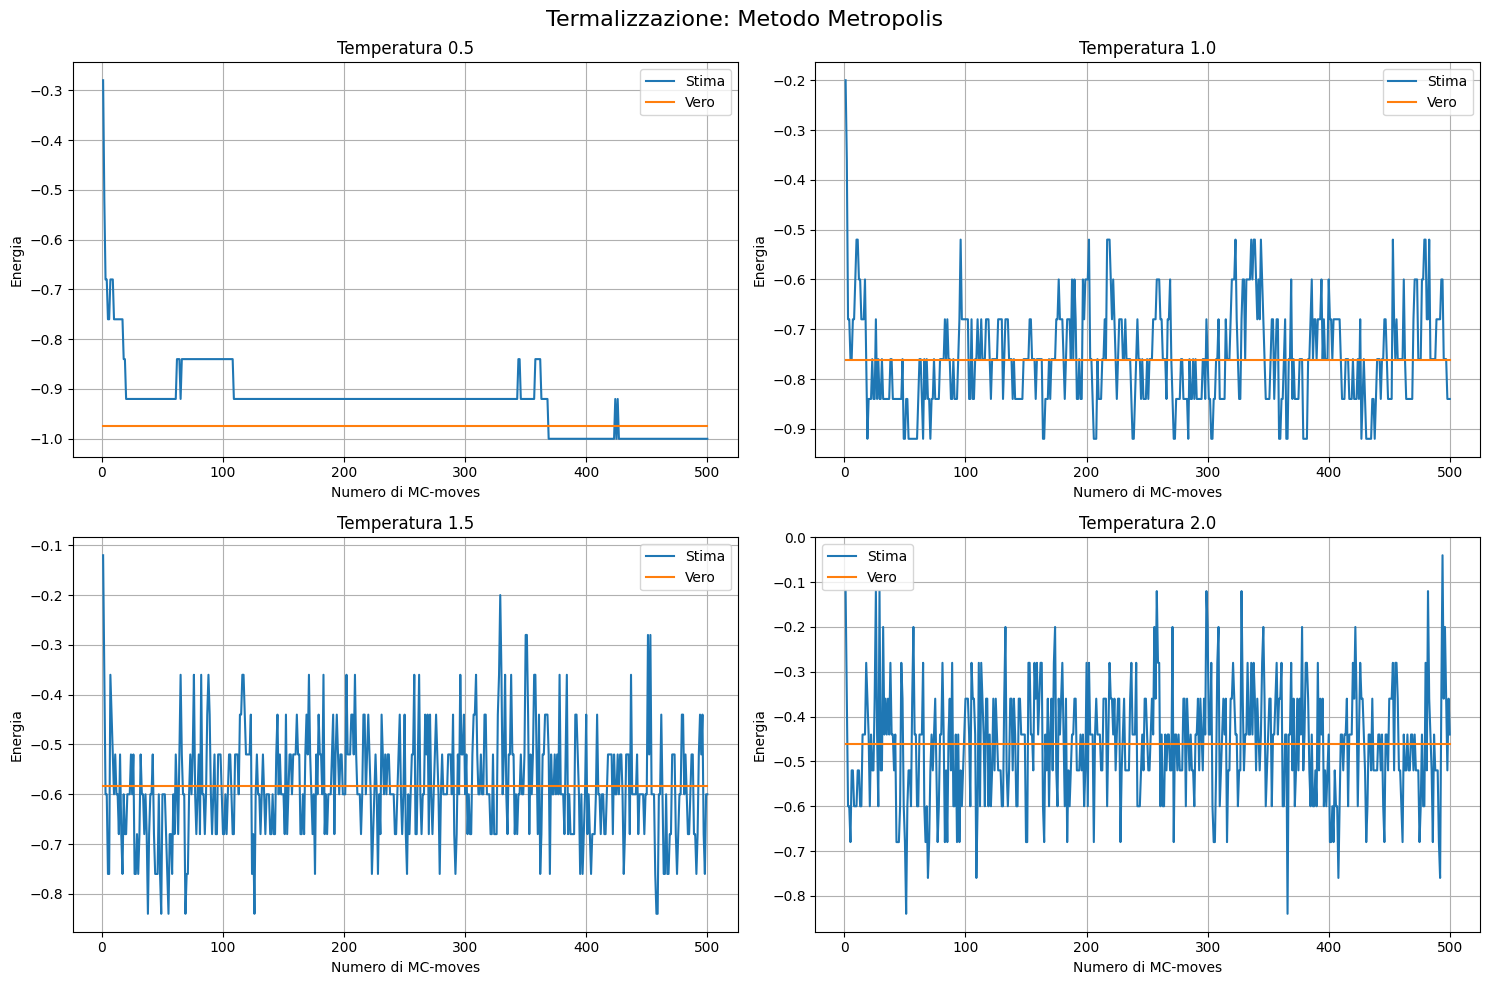

In [68]:
figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):
        axes[i][j].plot(term[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], term[1, (2*i + j) * 500 : 500 + (2*i + j) * 500], label = "Stima")
        axes[i][j].plot(term[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], np.array([e_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Energia')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)
        axes[i][j].legend(loc='best')

figura.suptitle('Termalizzazione: Metodo Metropolis', fontsize = '16')

plt.tight_layout()
plt.show()

##### Metodo di Gibbs

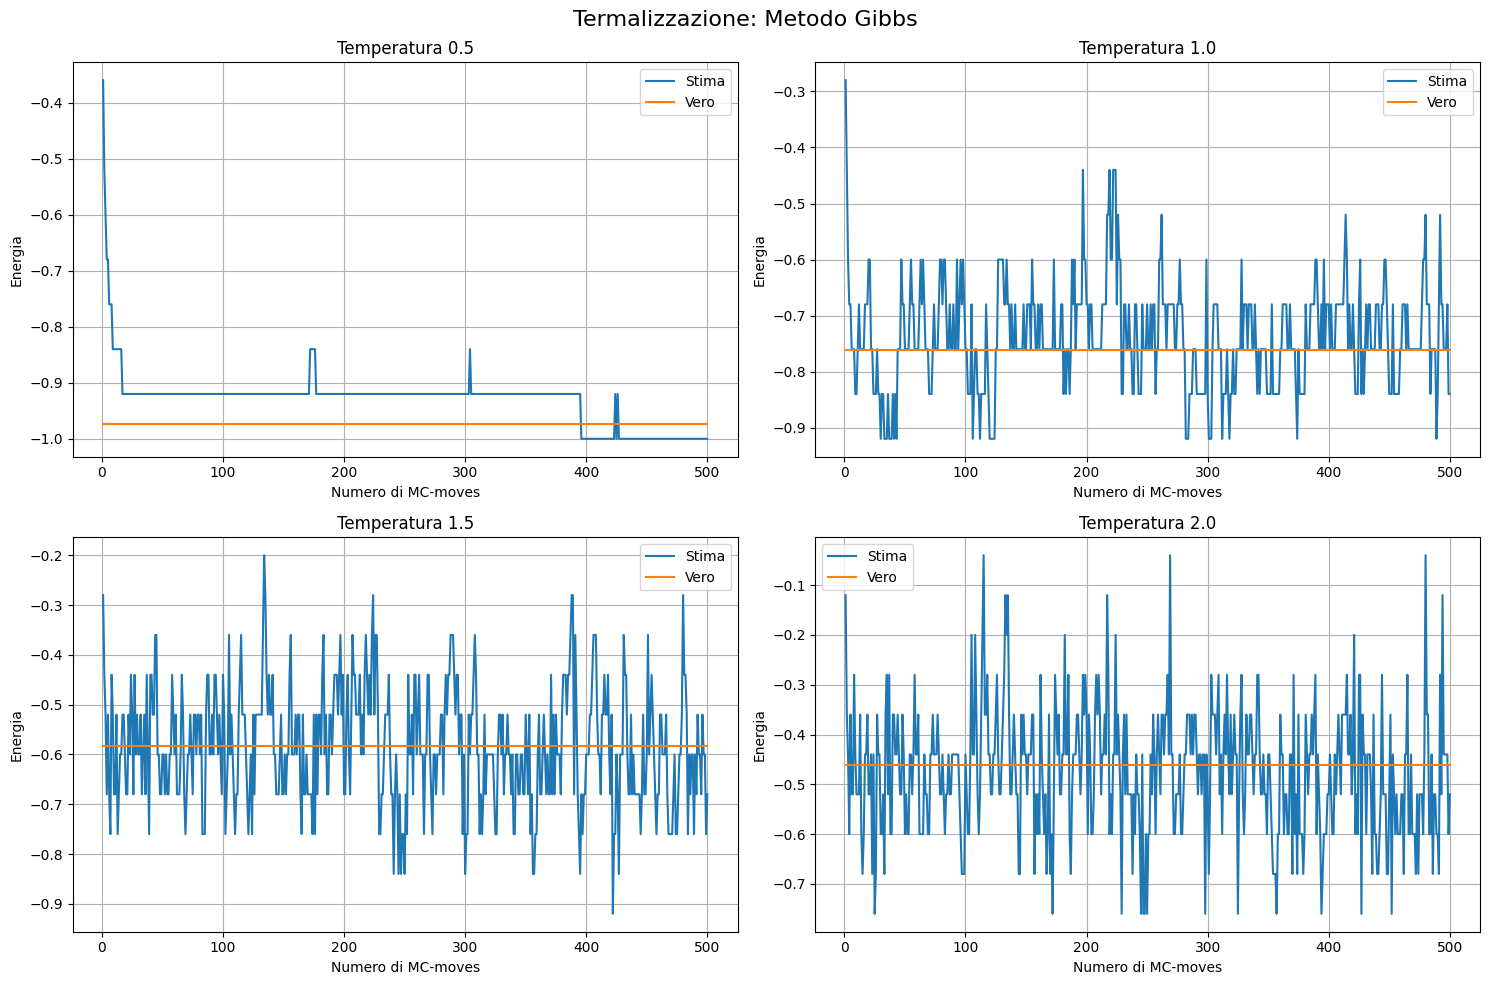

In [69]:
figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):
        axes[i][j].plot(term[0, 2000 + (2*i + j) * 500 : 2500 + (2*i + j) * 500], term[1, 2000 + (2*i + j) * 500 : 2500 + (2*i + j) * 500], label = "Stima")
        axes[i][j].plot(term[0, 2000 + (2*i + j) * 500 : 2500 + (2*i + j) * 500], np.array([e_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Energia')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)
        axes[i][j].legend(loc='best')

figura.suptitle('Termalizzazione: Metodo Gibbs', fontsize = '16')

plt.tight_layout()
plt.show()

Notiamo che in entrambi i casi l'equilibrazione che richiede più tempo è quella a $T\,=\,0.5$, ossia alla temperatura minima. Dopo circa 500 mosse può essere però considerato termalizzato.

### $h\,=\,0.02$

Nel caso con campo esterno non nullo consideriamo invece come osservabile significativo la magnetizzazione.

In [70]:
h_1=0.02 #external field
b_1 = 1/T_1

l_1 = np.exp(b_1*J)*np.cosh(b_1*h_1)+np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J))
l_2 = np.exp(b_1*J)*np.cosh(b_1*h_1)-np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J))
Z_1 = l_1**Ns + l_2**Ns
M_1 = (np.exp(b_1*J)*np.sinh(b_1*h_1)*((l_1**(Ns-1))*(1+np.exp(b_1*J)*np.cosh(b_1*h_1)/np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J))) 
        + (l_2**(Ns-1))*(1-np.exp(b_1*J)*np.cosh(b_1*h_1)/np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J)))))/(Z_1)

##### Metropolis

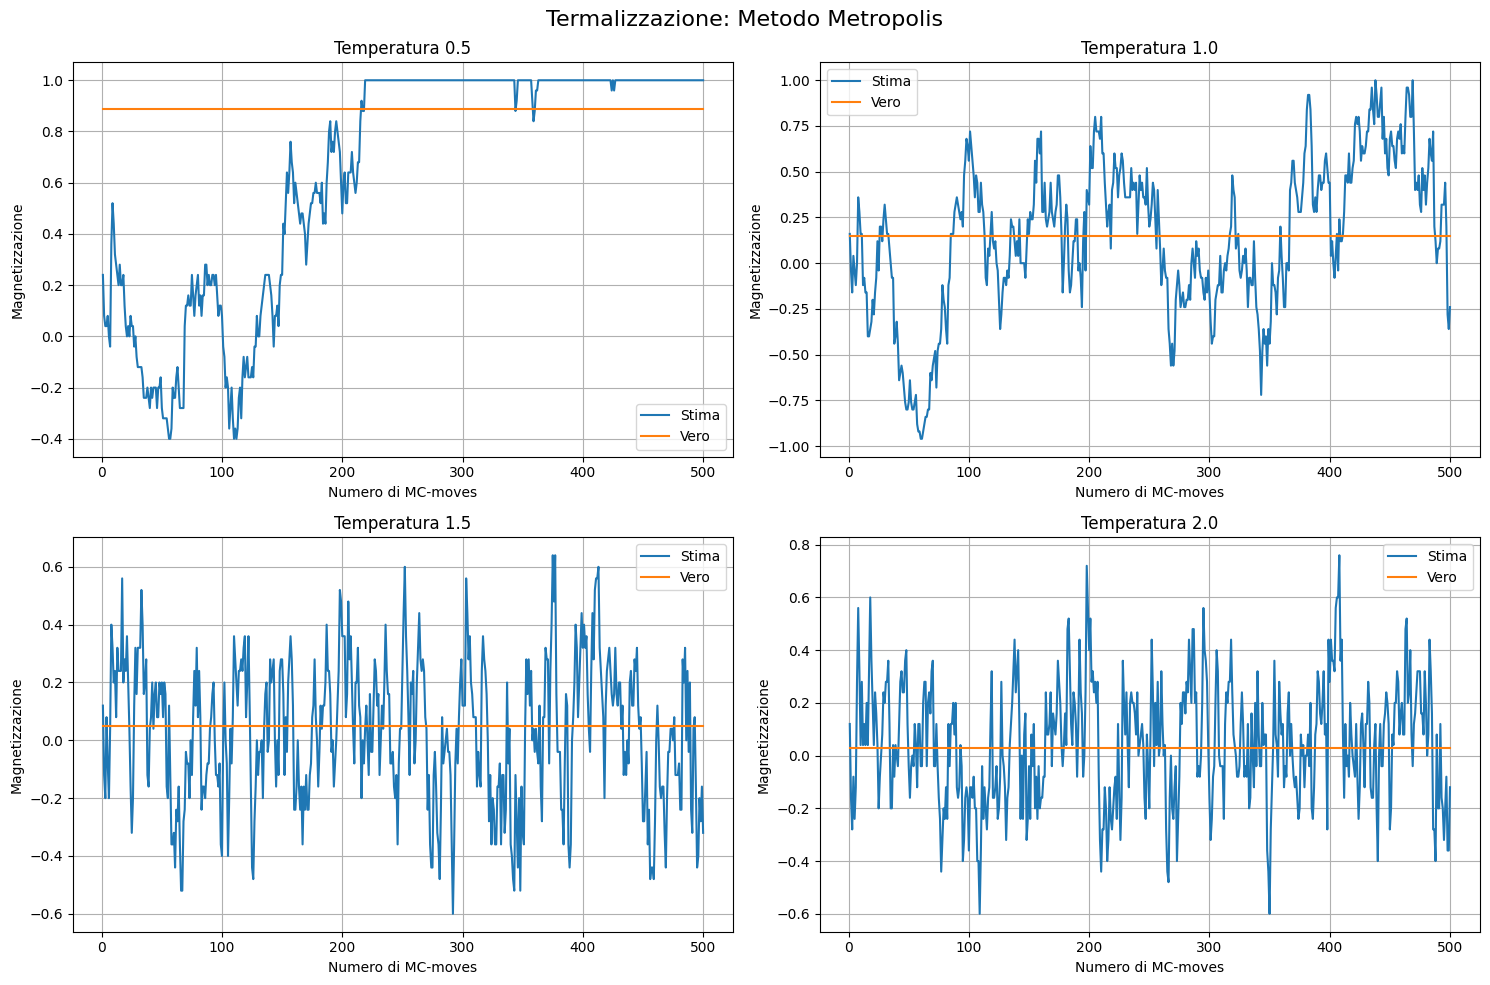

In [71]:
termh = np.loadtxt("Osservabili/TermMagn.dat", unpack=True)

figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):
        axes[i][j].plot(termh[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], termh[1, (2*i + j) * 500 : 500 + (2*i + j) * 500], label = "Stima")
        axes[i][j].plot(termh[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], np.array([M_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Magnetizzazione')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)
        axes[i][j].legend(loc='best')

figura.suptitle('Termalizzazione: Metodo Metropolis', fontsize = '16')

plt.tight_layout()
plt.show()

##### Gibbs

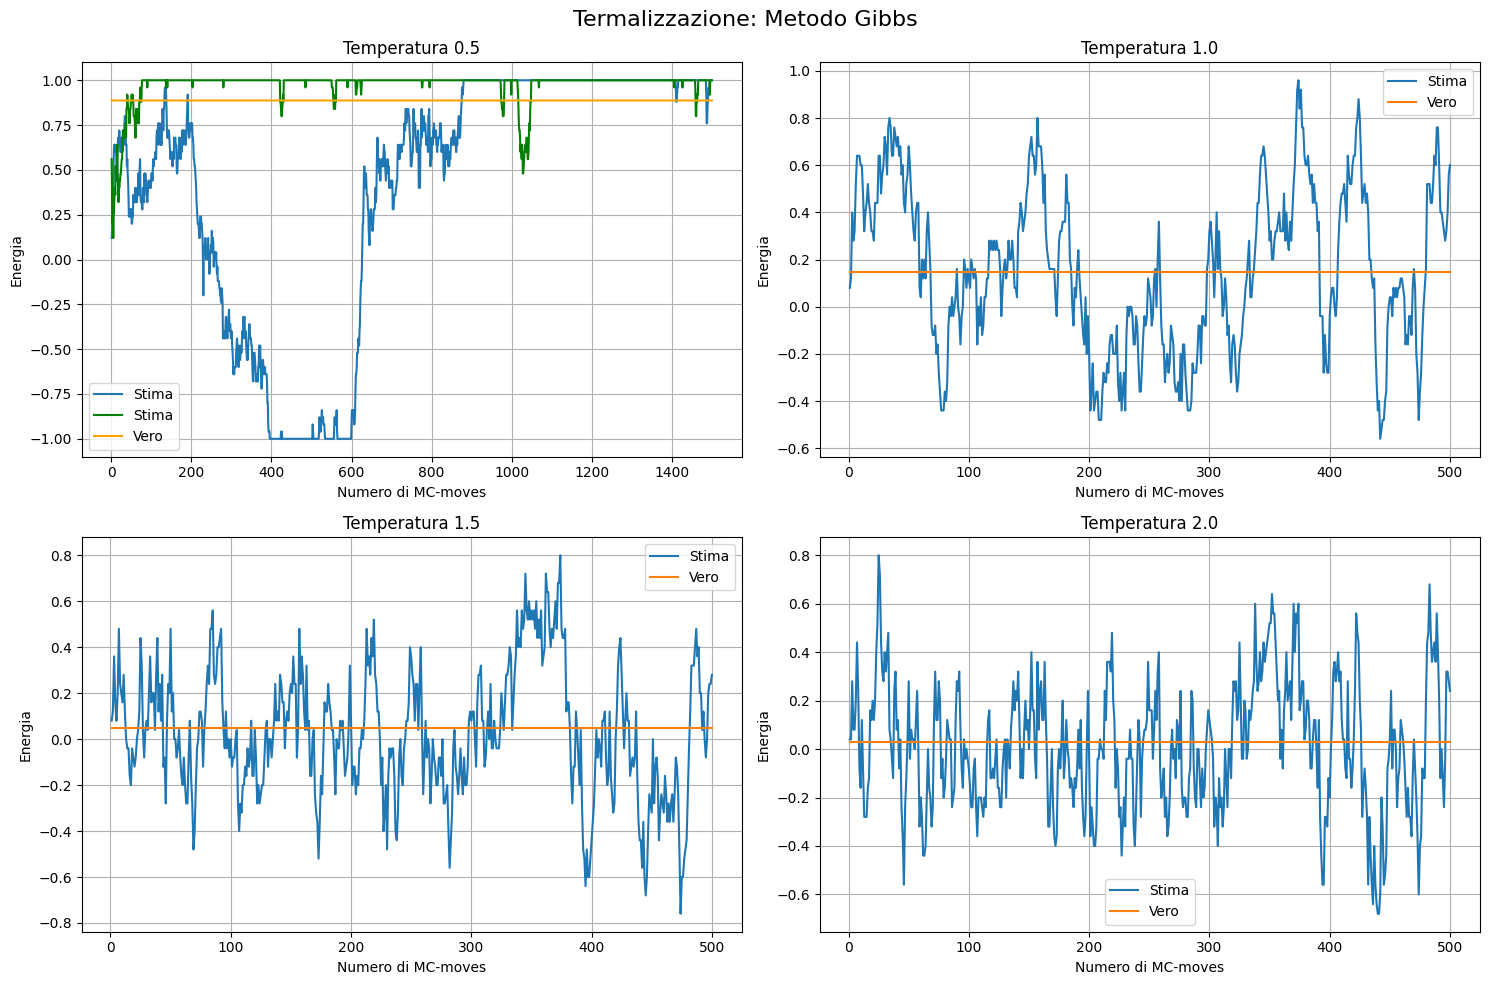

In [72]:
figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):

        if i==0 and j==0:
            axes[i][j].plot(termh[0, 2000 : 3500], termh[1, 2000 : 3500], label = "Stima")
            axes[i][j].plot(termh[0, 5000 : 6500], termh[1, 5000 : 6500], label = "Stima", color = "green")
            axes[i][j].plot(termh[0, 2000 : 3500], np.array([M_1[0] for k in range(0, 1500)]), label = "Vero", color = "orange")
        
        else:
            axes[i][j].plot(termh[0, 3000 + (2*i + j) * 500 : 3500 + (2*i + j) * 500], termh[1, 3000 + (2*i + j) * 500 : 3500 + (2*i + j) * 500], label = "Stima")
            axes[i][j].plot(termh[0, 3000 + (2*i + j) * 500 : 3500 + (2*i + j) * 500], np.array([M_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Energia')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)
        axes[i][j].legend(loc='best')

figura.suptitle('Termalizzazione: Metodo Gibbs', fontsize = '16')

plt.tight_layout()
plt.show()

Anche in questo caso la termalizzazione che richiede più tempo è quella relativa alla simulazione a temperatura inferiore. Notiamo inoltre che nel caso di Gibbs ho dei tempi leggermente più lunghi, con anche una regione (fra i 400 e i 600 MC-moves) dove l'osservabile assume un valore completamente opposto a quello teoricamente accettato. Per verificare che non fosse un problema di implementazione del metodo di Gibbs ho eseguito una seconda termalizzazione inizializzando differentemente il generatore di numeri casuali: la traiettoria percorsa è nettamente differente in quanto sia la configurazione iniziale (spin orientati casualmente) che le evoluzioni dipendono da rnd. Ciò che troviamo è tuttavia confortante, ossia il metodo è corretto e la magetizzazione del sistema tende a uno.

### Valori veri per confronti

In [73]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

In [74]:
#Valori veri per successivi confronti#
points=16
h = 0.02
T_1 = np.linspace(0.5,2.0,num=points)
beta = 1/T_1
J = 1.0
Ns = 50
th = np.tanh(J/T_1)
thN= th**Ns
ch = 1/th
e_1 = -J*( th + ch*thN )/( 1 + thN )
heat_1=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X_1 = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
b = 1/T_1
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_1 = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

<span style="color:blue">

## Energia interna

</span>

L'energia interna per spin si ricava dalla funzione di partizione. Nel caso con $h\,=\,0$ si procede come di seguito:

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

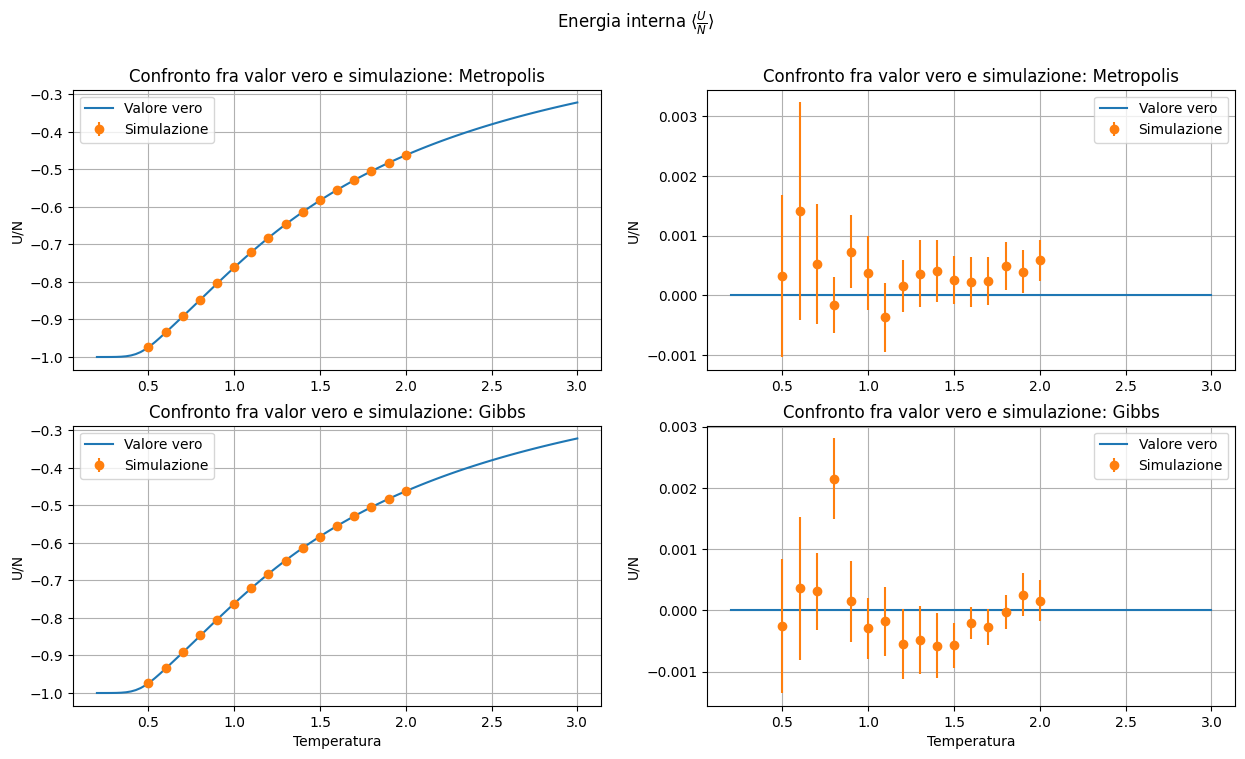

In [75]:
##Carico dati da file
energia = np.loadtxt("Osservabili/Energia.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Metropolis', 'Gibbs']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, e, label = 'Valore vero')
            axes[i][j].errorbar(energia[0, 0 + 16*i: 16*(1+i)], energia[1, 0 + 16*i: 16*(1+i)], yerr = energia[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = 'Simulazione')

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(energia[0, 0 + 16*i: 16*(1+i)], energia[1, 0 + 16*i: 16*(1+i)] - e_1, yerr = energia[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = 'Simulazione')

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('U/N')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)
        axes[i][j].legend()

fig.suptitle(r'Energia interna $\langle\frac{U}{N}\rangle$')

plt.show()

Notiamo che sia il metodo di Metropolis che quello di Gibbs restituiscono risultati in buon accordo con il modello teorico: i valori sono in generale compatibili con il valor vero ad un sigma.

<span style="color:blue">

## Calore specifico

</span>

Anche il calore specifico può essere ricavato dalla funzione di partizione. In particolare si ha che:
$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

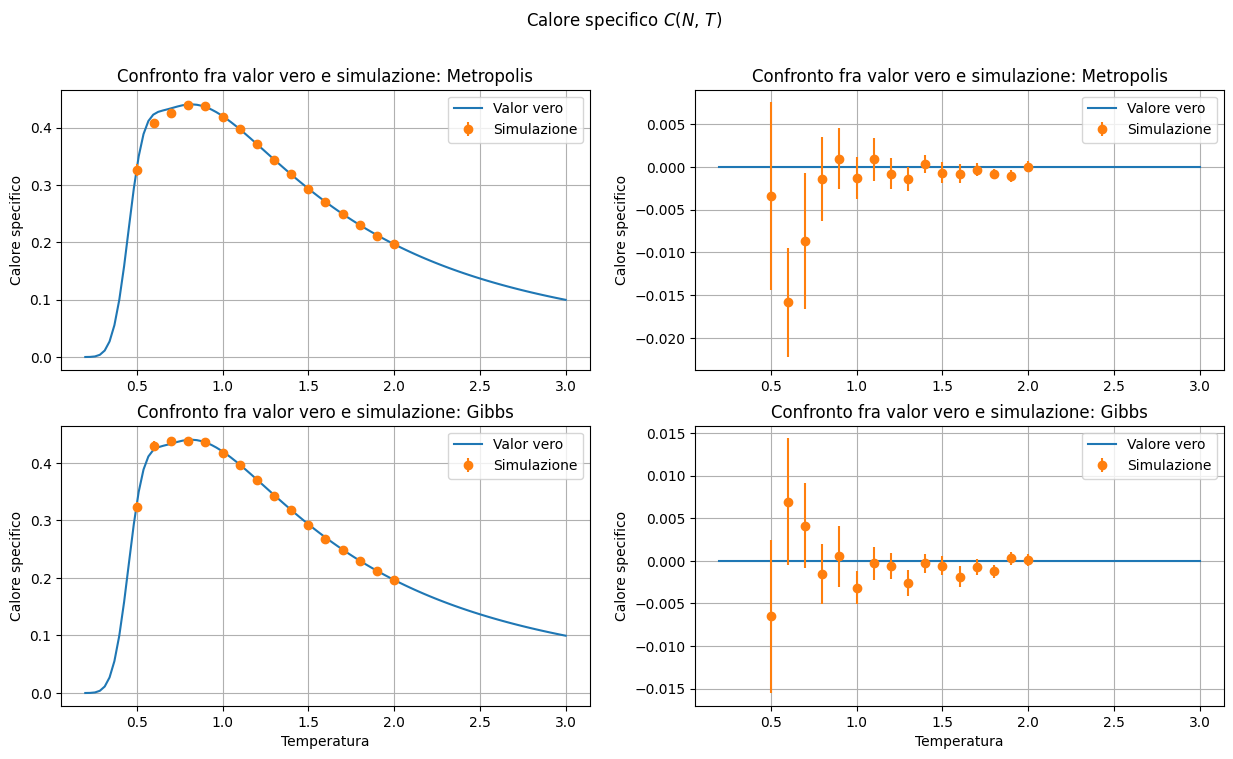

In [76]:
##Carico dati da file
cal_spec = np.loadtxt("Osservabili/CaloreSpecifico.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Metropolis', 'Gibbs']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, heat, label = "Valor vero")
            axes[i][j].errorbar(cal_spec[0, 0 + 16*i: 16*(1+i)], cal_spec[1, 0 + 16*i: 16*(1+i)], yerr = cal_spec[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = "Simulazione")

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(cal_spec[0, 0 + 16*i: 16*(1+i)], cal_spec[1, 0 + 16*i: 16*(1+i)] - heat_1, yerr = cal_spec[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = "Simulazione")

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('Calore specifico')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)
        axes[i][j].legend()

fig.suptitle(r'Calore specifico $C\left(N,\,T\right)$')

plt.show()

<span style="color:blue">

## Magnetizzazione

</span>

La magnetizzazione si ricava con $h\,=\,0.02$: questo perchè in assenza di campo esterno $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ conseguenza del fatto che in una sola dimensione non è possibile avere una transizione di fase in assenza di campo esterno.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

La formula esatta $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ è:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

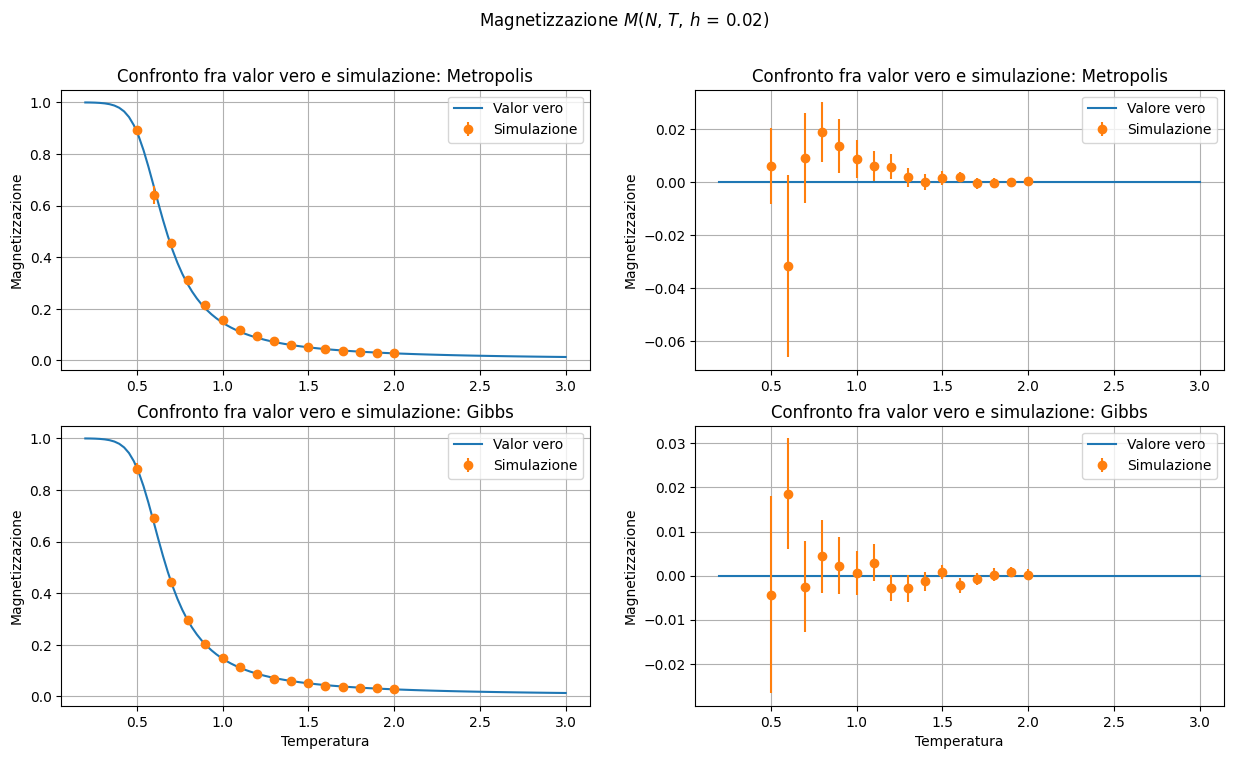

In [77]:
##Carico dati da file
magn = np.loadtxt("Osservabili/Magnetizzazione.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Metropolis', 'Gibbs']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, M, label = 'Valor vero')
            axes[i][j].errorbar(magn[0, 0 + 16*i: 16*(1+i)], magn[1, 0 + 16*i: 16*(1+i)], yerr = magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = 'Simulazione')

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(magn[0, 0 + 16*i: 16*(1+i)], magn[1, 0 + 16*i: 16*(1+i)] - M_1, yerr = magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = 'Simulazione')

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('Magnetizzazione')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)
        axes[i][j].legend()

fig.suptitle(r'Magnetizzazione $M\left(N,\,T,\,h\,=\,0.02\right)$')

plt.show()

<span style="color:blue">

## Suscettibilità magnetica

</span>

La suscettibilità magnetica (con $h\,=\,0$)si ottiene come:

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

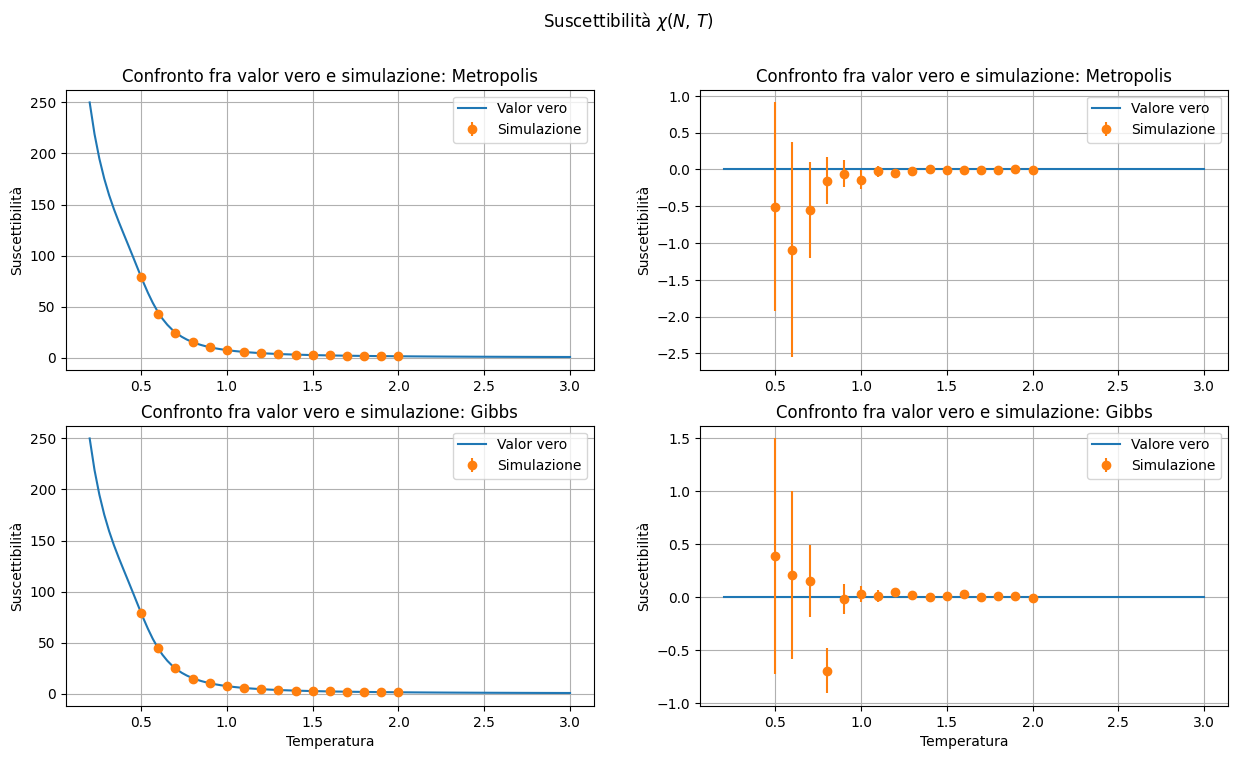

In [78]:
##Carico dati da file
susc_magn = np.loadtxt("Osservabili/Suscettibilità.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Metropolis', 'Gibbs']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, X, label = "Valor vero")
            axes[i][j].errorbar(susc_magn[0, 0 + 16*i: 16*(1+i)], susc_magn[1, 0 + 16*i: 16*(1+i)], yerr = susc_magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = "Simulazione")

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(susc_magn[0, 0 + 16*i: 16*(1+i)], susc_magn[1, 0 + 16*i: 16*(1+i)] - X_1, yerr = susc_magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o', label = "Simulazione")

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('Suscettibilità')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)
        axes[i][j].legend()

fig.suptitle(r'Suscettibilità $\chi\left(N,\,T\right)$')

plt.show()